## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0, 19).round(2)
y = np.array([-1*x+2 for x in X]).round(2)

#### Plot your data points. 

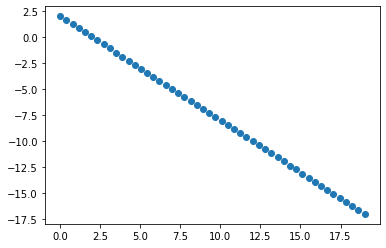

In [3]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [4]:
def predict(X, theta_0, theta_1):
  y_predicted = [(theta_0 + theta_1*point) for point in X]
  return y_predicted

def plot_loss_epochs(loss, epochs):
  plt.plot(np.arange(epochs), list(loss))
  plt.show()

def plot_regression_line(x, y, h_list):
  for h in h_list :
    plt.scatter(X,y)
    plt.plot(X, h)
    plt.xlabel('x')
    plt.ylabel('y')
  plt.show()

def plot_thetas_loss(thetas_0, thetas_1, loss):
  plt.plot(thetas_0, list(loss))
  plt.xlabel('thetas_0')
  plt.ylabel('loss')
  plt.show()
  plt.plot(thetas_1, list(loss))
  plt.xlabel('thetas_1')
  plt.ylabel('loss')
  plt.show()

In [10]:
def full_batch_gd(X, y, LEARNING_RATE, iterations):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)
    temp_theta_0 = theta_0 - (LEARNING_RATE * (np.sum(distance)/array_length))
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
    temp_theta_1 = theta_1 - (LEARNING_RATE * (np.sum(theta_1_cost)/array_length))
    theta_0 = temp_theta_0
    theta_1 = temp_theta_1
  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

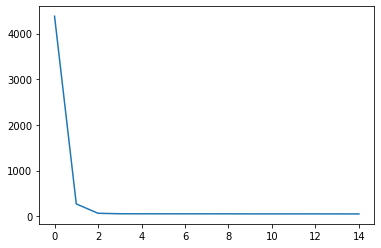

In [8]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = full_batch_gd(X,y,0.01,15)
y_predicted = predict(X, new_theta_0, new_theta_1)
r2_score(y, y_predicted)
plot_loss_epochs(loss_list, 15)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.


In [1]:
GAMMA = .9

In [12]:
def momentum_gd(X, y, LEARNING_RATE, iterations, gamma):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  theta_temp_0 = 0
  theta_temp_1 = 0
  v_0 = 0
  v_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)

    gradient_0 = np.sum(distance)/array_length
    temp_theta_0 = (gamma * v_0) + LEARNING_RATE * gradient_0
    v_0 = temp_theta_0
    theta_0 = theta_0 - temp_theta_0
    
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance)]
    gradient_1 = (np.sum(theta_1_cost)/array_length)
    temp_theta_1 = (gamma * v_1) + (LEARNING_RATE * gradient_1)
    v_1 = temp_theta_1
    theta_1 = theta_1 - temp_theta_1

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

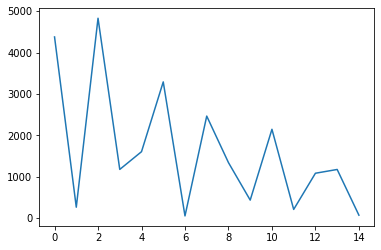

In [13]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = momentum_gd(X,y,0.01,15, GAMMA)
y_predicted = predict(X, new_theta_0, new_theta_1)
print(r2_score(y, y_predicted))
plot_loss_epochs(loss_list, 15)

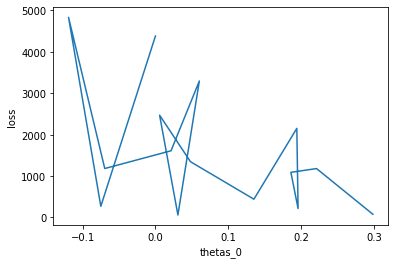

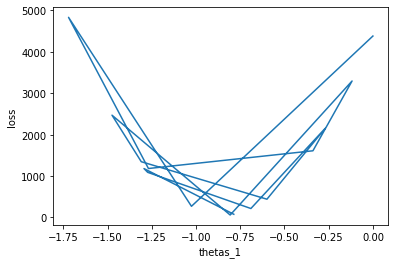

In [15]:
plot_thetas_loss(thetas_0, thetas_1, loss_list)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

0.21030785436730315


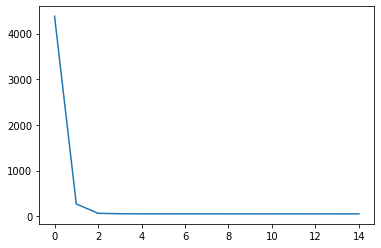

In [14]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = momentum_gd(X,y,0.01,15, 0.0001)
print(r2_score(y, y_predicted))
plot_loss_epochs(loss_list, 15)

0.21030785436730315


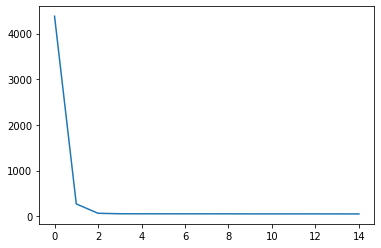

In [15]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = momentum_gd(X,y,0.01,15, 0)
print(r2_score(y, y_predicted))
plot_loss_epochs(loss_list, 15)

0.21030785436730315


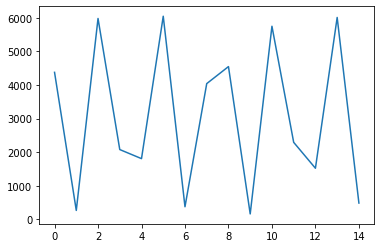

In [16]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = momentum_gd(X,y,0.01,15, 0.998)
print(r2_score(y, y_predicted))
plot_loss_epochs(loss_list, 15)

### Update your Batch GD for one variable  implementation to be NAG and check your results

![image.png](attachment:image.png)

In [5]:
def nag(X, y, LEARNING_RATE, iterations, gamma):
  losses = []
  y_preds = []
  theta_0_list = []
  theta_1_list = []
  theta_0 = 0
  theta_1 = 0
  theta_temp_0 = 0
  theta_temp_1 = 0
  v_0 = 0
  v_1 = 0
  array_length = X.size
  for i in range(iterations):
    theta_0_list.append(theta_0)
    theta_1_list.append(theta_1)
    y_predicted = [(theta_0 + theta_1*point) for point in X ]
    y_preds.append(y_predicted)
    distance = y_predicted - y
    squared_distance = [value**2 for value in distance]
    loss = np.sum(squared_distance)
    losses.append(loss)
    cost = loss/(2*array_length)

    theta_temp_0 = theta_0 - (gamma * v_0)
    theta_temp_1 = theta_1 - (gamma * v_1)

    y_new = [(theta_temp_0 + theta_temp_1*point) for point in X]
    distance_new = y_new - y
    squared_distance_new = [value**2 for value in distance_new]
    loss_new = np.sum(squared_distance_new)
    cost = loss_new/(2*array_length)
    theta_1_cost = [current_x*current_distance for current_x, current_distance in zip(X,distance_new)]

    gradient_0 = np.sum(distance_new)/array_length
    gradient_1 = (np.sum(theta_1_cost)/array_length)

    theta_0 = theta_temp_0 - (LEARNING_RATE * gradient_0)
    v_0 = (gamma * v_0) + (LEARNING_RATE * gradient_0)

    theta_1 = theta_temp_1 - (LEARNING_RATE * gradient_1)
    v_1 = (gamma * v_1) + (LEARNING_RATE * gradient_1)

  return theta_0, theta_1, losses, y_preds, theta_0_list, theta_1_list

In [8]:
new_theta_0, new_theta_1, loss_list, new_y, thetas_0, thetas_1 = nag(X,y,0.01,8, GAMMA)

In [9]:
y_predicted = predict(X, new_theta_0, new_theta_1)
r2_score(y, y_predicted)

0.9669348094703665

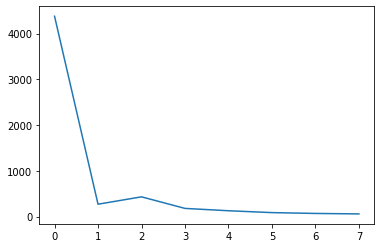

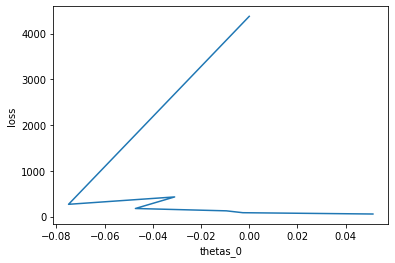

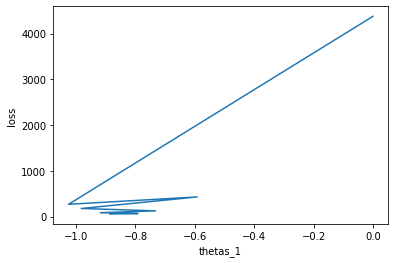

In [11]:
plot_loss_epochs(loss_list, 8)
plot_thetas_loss(thetas_0, thetas_1, loss_list)